# Домашнее задание по теме: Регрессия (линейная/полиномиальная)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (Apartment data)](https://www.kaggle.com/gunhee/koreahousedata)

In [12]:
df = pd.read_csv("./../../data/Daegu_Real_Estate_data.csv")

pd.options.display.max_columns = None

df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,N_manager,N_elevators,SubwayStation,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,3.0,0.0,Kyungbuk_uni_hospital,2.0,1,1.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,6.0,5.0,11.0,Sin-nam,1.0,1,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,8.0,20.0,Myung-duk,6.0,2,0.0,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,3.0,11.0,Myung-duk,3.0,1,1.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,2.0,1.0,4.0,Kyungbuk_uni_hospital,3.0,2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

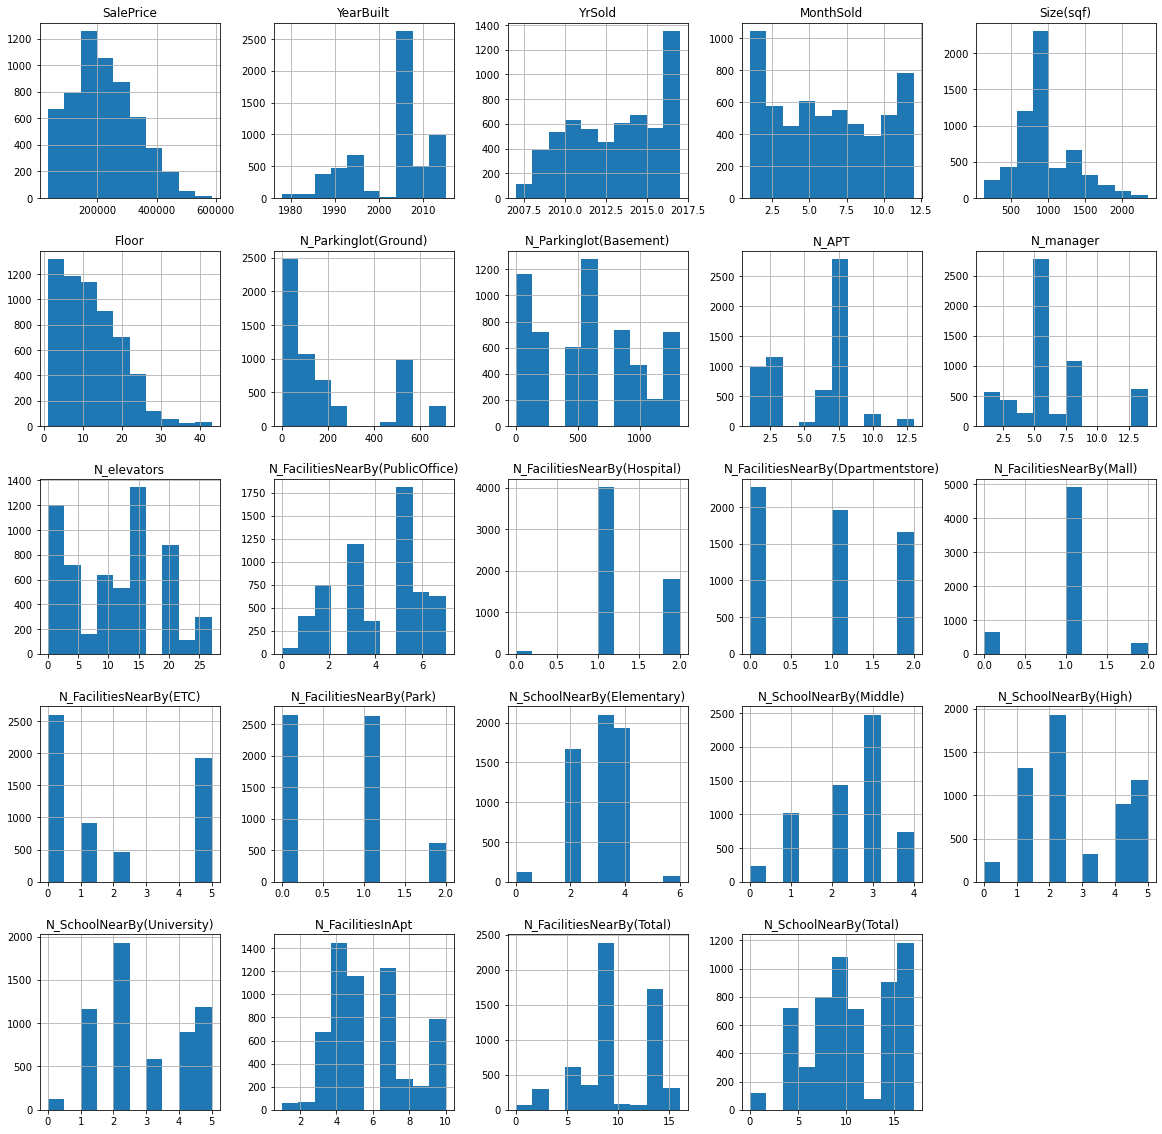

In [13]:
_ = df.hist(figsize = (20, 20))

Text(0.5, 1.0, 'Correlation Matrix of features')

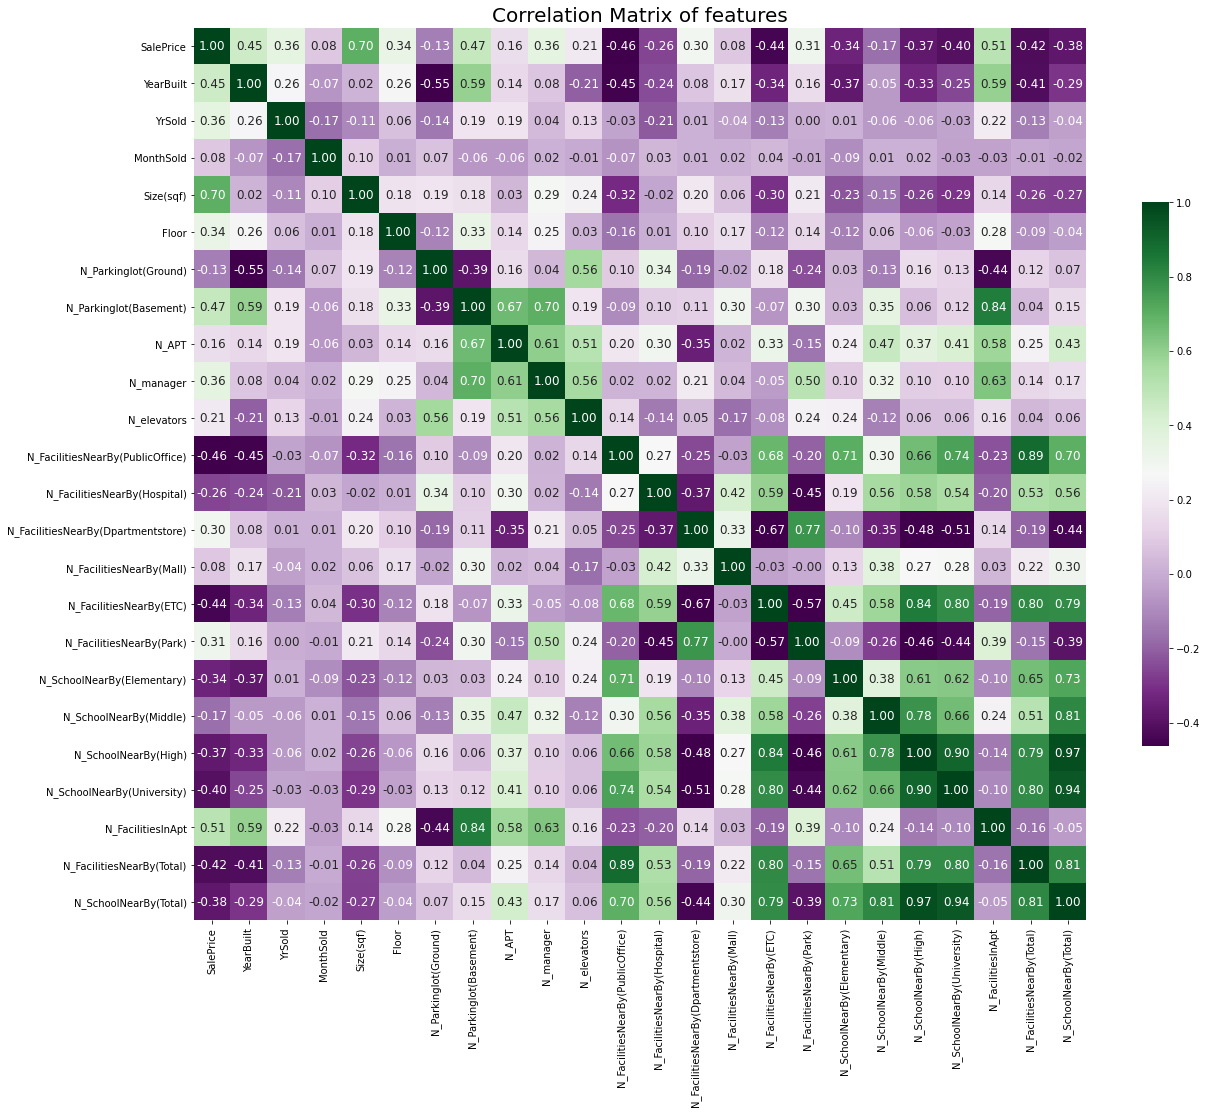

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))

ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='PRGn',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12},
    robust=True
)

plt.title('Correlation Matrix of features', fontsize=20)

## Простая линейная регрессия

In [19]:
from sklearn.model_selection import train_test_split

y = df['SalePrice'].copy()
X = df[['Size(sqf)']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

simple_regr = linear_model.LinearRegression()
simple_regr.fit(X_train, y_train)
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ', simple_regr.intercept_)

In [ ]:
plt.scatter(X_train, y_train,  color='red')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)

plt.plot(X_train, simple_regr.coef_[0]*X_train + simple_regr.intercept_, '-g', linewidth=6)
plt.xlabel("bathrooms", fontsize=20)
plt.ylabel("price", fontsize=20)

In [ ]:
y_predicted = simple_regr.predict(X_test)

print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

## Множественная линейная регрессия (N-D)

In [ ]:
# выбрать даннные для обучения / предсказания
y = df['SalePrice'].copy()
X = df[['Size(sqf)', 'N_FacilitiesInApt', 'N_Parkinglot(Basement)']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
multiple_regr = linear_model.LinearRegression()
multiple_regr.fit(X_train, y_train)

print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

y_predicted = multiple_regr.predict(X_test)

print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

---

In [ ]:
df_num = df.select_dtypes(include=[np.number])
df_num.info()

In [ ]:
df_obj = df.select_dtypes(exclude=[np.number])
df_obj.info()

In [ ]:
df_obj.columns

In [ ]:
# разделить независимую и зависимую переменные / train и test
y = df['SalePrice'].copy()
X = df.drop(['SalePrice'], axis=1)
X = X.drop(df_obj.columns, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
multiple_regr = linear_model.LinearRegression()
multiple_regr.fit(X_train, y_train)

print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

y_predicted = multiple_regr.predict(X_test)

print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

## XGBoost for Regression

In [ ]:
xgb_r = xg.XGBRegressor(n_estimators=750, 
                        learning_rate=0.05, 
                        max_depth=5) 

# Fitting the model 
xgb_r.fit(X_train, y_train) 

# Predict the model 
y_predicted = xgb_r.predict(X_test) 

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")